<a href="https://colab.research.google.com/github/deisyrojas2/Intro-IA/blob/main/01_exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!kaggle competitions download -c udea-ai4eng-20242

 89% 18.0M/20.1M [00:00<00:00, 189MB/s]
100% 20.1M/20.1M [00:00<00:00, 197MB/s]


In [17]:
!unzip udea-ai4eng-20242.zip

Archive:  udea-ai4eng-20242.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [44]:
import pandas as pd
import numpy as np

datos = pd.read_csv("train.csv")
datos.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


In [45]:
datos = datos[['ESTU_HORASSEMANATRABAJA', 'RENDIMIENTO_GLOBAL', 'FAMI_TIENEINTERNET', 'FAMI_ESTRATOVIVIENDA']]
datos.head()

,ESTU_HORASSEMANATRABAJA,RENDIMIENTO_GLOBAL,FAMI_TIENEINTERNET,FAMI_ESTRATOVIVIENDA
0,Menos de 10 horas,medio-alto,Si,Estrato 3
1,0,bajo,No,Estrato 3
2,Más de 30 horas,bajo,Si,Estrato 3
3,0,alto,Si,Estrato 4
4,Entre 21 y 30 horas,medio-bajo,Si,Estrato 3


In [46]:
!pip install rlxutils

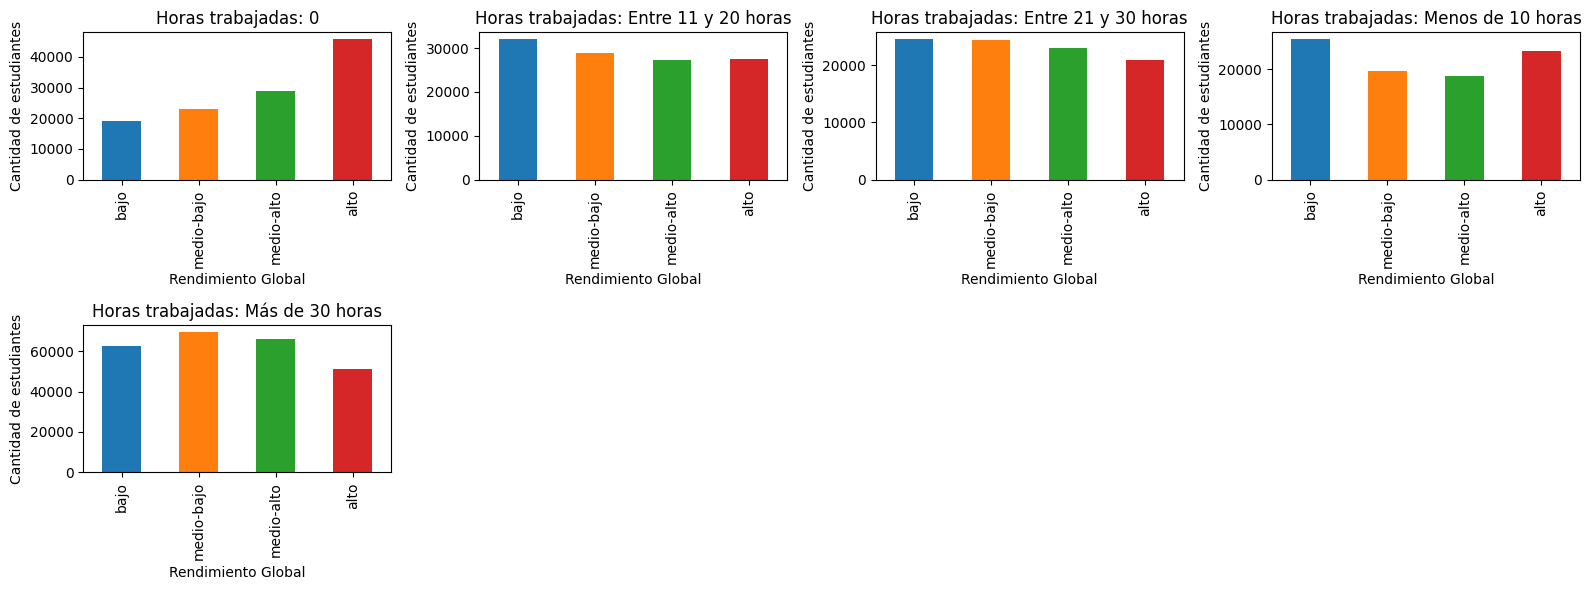

In [47]:
from rlxutils import subplots
import matplotlib.pyplot as plt

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
hora_trabajo= sorted(datos.ESTU_HORASSEMANATRABAJA.value_counts().index)
for ax,ci in subplots(hora_trabajo, n_cols=4, usizex=4):
    zc = datos[datos.ESTU_HORASSEMANATRABAJA==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar',color=colors)
    plt.title(f'Horas trabajadas: {ci}')
    plt.xlabel('Rendimiento Global')
    plt.ylabel('Cantidad de estudiantes')

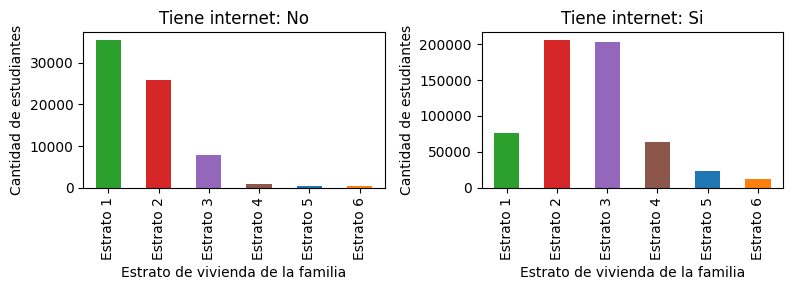

In [49]:
colores = ['#2ca02c', '#d62728', '#9467bd', '#8c564b', '#1f77b4', '#ff7f0e']
estrato_internet = sorted(datos.FAMI_TIENEINTERNET.value_counts().index)
for ax,ci in subplots(estrato_internet, n_cols=4, usizex=4):
    zc = datos[datos.FAMI_TIENEINTERNET==ci]
    zc.FAMI_ESTRATOVIVIENDA.value_counts()[['Estrato 1', 'Estrato 2','Estrato 3','Estrato 4','Estrato 5','Estrato 6']].plot(kind='bar', color=colores)
    plt.title(f'Tiene internet: {ci}')
    plt.xlabel('Estrato de vivienda de la familia')
    plt.ylabel('Cantidad de estudiantes')